In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-3b5970faf0be>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto.csv', encoding = 'utf-8', header = None)

In [4]:
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']

In [11]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label
0,529590949136326656,842564341,"As an aside, Toronto is home to @magpietoronto where Prince @3RDEYEGIRL get a lot of their stage clothes...",2014-11-04 11:08:16+00:00,5.295916496182477e+17,1538385210.0,"@PrinceMuseum @magpietoronto @3RDEYEGIRL Lol, hopefully stocking up on the Summer range 2 pop down 2 Australia!!",2014-11-04 11:11:03+00:00,0
1,529695075560071168,134586361,Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.,2014-11-04 18:02:01+00:00,5.2969653233833984e+17,62111733.0,“@ellhah: Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.”,2014-11-04 18:07:49+00:00,0
2,529695075560071168,134586361,Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.,2014-11-04 18:02:01+00:00,5.296979650496717e+17,44644732.0,@ellhah Prince x Red Drink Boutique invite only party will be a story for another day...,2014-11-04 18:13:30+00:00,0
3,529755373721632768,1395136699,PRINCE gives Toronto purple balls .....,2014-11-04 22:01:38+00:00,NaN,NaN,,NaT,0
4,529761572881985536,43451286,Dammit Prince. Toronto needs a win right now.,2014-11-04 22:26:16+00:00,NaN,NaN,,NaT,0


In [9]:
df.shape

(768, 9)

+ change data type

In [6]:
df.src_tweet_id = df.src_tweet_id.astype(str)
df.src_user_id = df.src_user_id.astype(str)

df.reply_tweet_id = df.reply_tweet_id.astype(str)
df.reply_tweet_id = df.reply_tweet_id.replace('nan',np.nan)

df.reply_user_id = df.reply_user_id.astype(str)
df.reply_user_id = df.reply_user_id.replace('nan',np.nan)

df.src_date = df.src_date.apply(pd.to_datetime)
df.reply_date = df.reply_date.apply(pd.to_datetime)

df.reply_tweet = df.reply_tweet.replace(np.nan,"")

+ Source Tweet Data: **src_tw_df**

In [7]:
#Source tweet data
src_tw_df = df.iloc[:,[0,1,2,3,8]].copy()
src_tw_df = src_tw_df.drop_duplicates().reset_index()

In [ ]:
src_tw_df.head()

# EDA

## Missing Value

In [8]:
df.isnull().sum()

src_tweet_id      0 
src_user_id       0 
src_tweet         0 
src_date          0 
reply_tweet_id    99
reply_user_id     99
reply_tweet       0 
reply_date        99
label             0 
dtype: int64

+ drop rows where there is missing value.

In [24]:
df.dropna(inplace=True)

## Statistics

In [9]:
print("# of source tweets:",src_tw_df.src_tweet_id.nunique())
print("# of source users:",src_tw_df.src_user_id.nunique())
print("# of reply users:",df.reply_user_id.nunique())
print("# of reply tweets:",df.reply_tweet_id.nunique())

# of source tweets: 233
# of source users: 167
# of reply users: 428
# of reply tweets: 669


## Visualiztion 

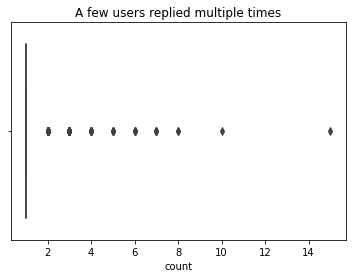

In [38]:
reply_user = df.reply_user_id.value_counts().sort_values(ascending=False).to_frame()
reply_user.rename(columns={'reply_user_id' :'count'},inplace=True)
sns.boxplot(data=reply_user ,x='count')
plt.title("A few users replied multiple times")
plt.savefig('graph/prince-toronto/reply_user-1.pdf',dpi=300)

In [32]:
more_freq_reply_user = reply_user.loc[reply_user['count'] > 1].index
more_freq_reply_user

Index(['430880741.0', '2841460589.0', '2838281055.0', '451938702.0',
       '202922157.0', '842564341.0', '1922322728.0', '103338203.0',
       '526528241.0', '83715203.0',
       ...
       '1199735966.0', '1720186279.0', '421251101.0', '1262935440.0',
       '2806596777.0', '424393523.0', '34492089.0', '281753900.0',
       '2738314259.0', '439502873.0'],
      dtype='object', length=106)

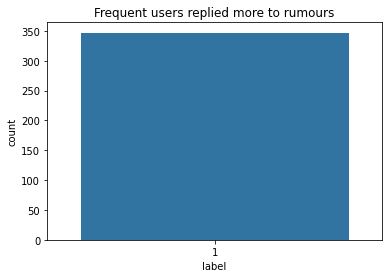

In [39]:
more_freq = df[df['reply_user_id'].isin(more_freq_reply_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Frequent users replied more to rumours')
plt.savefig('graph/prince-toronto/reply_user-2.pdf',dpi=300)

            count
842564341   8    
19000033    8    
12993222    6    
14705603    6    
17758398    4    
...        ..    
2437473804  1    
19114232    1    
21359504    1    
421251101   1    
58413196    1    

[167 rows x 1 columns]


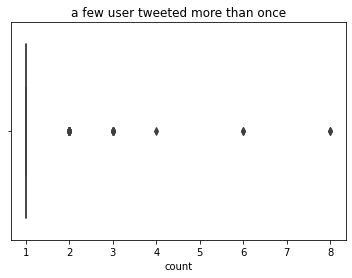

<Figure size 432x288 with 0 Axes>

In [29]:
source_user = src_tw_df.src_user_id.value_counts().sort_values(ascending=False).to_frame()
source_user.rename(columns={'src_user_id' :'count'},inplace=True)
print(source_user)
sns.boxplot(data=source_user ,x='count')
plt.title('a few user tweeted more than once',fontsize = 12)
plt.show()
plt.savefig('graph/prince-toronto/source_user-1.pdf',dpi=300)

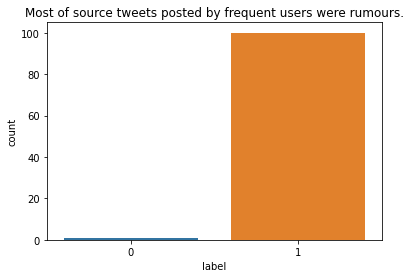

In [37]:
more_freq_src_user = source_user.loc[source_user['count'] > 1].index
more_freq_src_user
more_freq = src_tw_df[src_tw_df['src_user_id'].isin(more_freq_src_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Most of source tweets posted by frequent users were rumours.')
plt.savefig('graph/prince-toronto/src_user-2.pdf',dpi=300)

In [ ]:
df.groupby('src_tweet_id')['label'].value_counts().sort_values('label')#.plot(kind = 'bar')
# plt.title('Rumour tweet are more than non-rumor tweet',fontsize = 14)
# plt.xlabel('Rumor / Non-Rumour', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()